# Infor

Plot the results in roll equation case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 16})

# 0 useful functions 

In [3]:
def plot_results(lim_y):
    
    n_init = 8
    plt.figure(figsize=(5,4))
    x_range = np.arange(n_init, n_init + lh_results.shape[1])
    # seq line
    plt.plot(x_range, np.mean(seq_results, axis=0), label='seq')
    plt.fill_between(x_range, np.mean(seq_results, axis=0), 
                     np.mean(seq_results, axis=0) + 1 * np.std(seq_results, axis=0),
                     alpha=0.4)
    # lh line
    plt.plot(x_range, np.mean(lh_results, axis=0), label='lh')
    plt.fill_between(x_range, np.mean(lh_results, axis=0), 
                     np.mean(lh_results, axis=0) + 1 * np.std(lh_results, axis=0),
                     alpha=0.2)
    # p^a_{temp}
    plt.plot(x_range, np.ones_like(x_range) * [p_group_true] * (1.03), 'k--', label='3% error')
    plt.plot(x_range, np.ones_like(x_range) * [p_group_true] * (0.97), 'k--')
    # p_{temp}
    plt.plot(x_range, np.ones_like(x_range) * [p_true], color='green')
    plt.xlabel('num of samples')
    plt.ylabel('exceeding prob')
    plt.xticks([10,20,30,40,50,60])
    plt.title('$r_s=$' + str(r_s))
    plt.ylim(lim_y)
    plt.tight_layout()
    plt.show()

In [4]:
def compute_p_temp(r_s):
    return np.where(abs(true.reshape(-1)) > r_s)[0].shape[0] / true.reshape(-1).shape[0]

In [5]:
def compute_p_a_temp(r_s, D_thr): # 还是一样的api界面啊
    exceeding_num = np.zeros(len(true_groups))
    for i, true_group in enumerate(true_groups):
        exceeding_num[i] = np.argwhere(abs(true_group) > r_s).shape[0]
        if scores[i] < (1 - D_thr):
            exceeding_num[i] = 0
    return np.sum(exceeding_num) / len(seeds) / 38400 # len(true[0])

In [6]:
def compute_group_max():
    group_max_results = np.zeros_like(scores)
    for i, true_group in enumerate(true_groups):
        group_max_results[i] = np.max(abs(true_group))
    return group_max_results

In [7]:
def compute_p_a_group(r_s, D_thr):
    return sum((scores > (1 - D_thr)) & (group_max_results > r_s)) / sum(scores > (1 - D_thr))

# 1. Invariance of temporal exceeding probability

----Note that approximately 8GB memory is needed----

$P_{temp}$

In [8]:
true = np.load('results/true.npy', allow_pickle=True)

In [9]:
print(compute_p_temp(0.25))

0.023456748188405797


$P^a_{temp}$

In [10]:
# load the results and data 
true_groups = np.load('results/true_groups.npy', allow_pickle=True)
scores = np.load('wavedata/scores.npy', allow_pickle=True)
seeds = np.load('wavedata/seeds.npy', allow_pickle=True)

In [11]:
r_s = 0.25
for D_thr in [0.35, 0.3, 0.25, 0.2]:
    print(str(D_thr), compute_p_a_temp(r_s, D_thr))

0.35 0.025660678097694494
0.3 0.02564234557585009
0.25 0.025542834004456613
0.2 0.024667695283714076


$P^a_{group}$

In [12]:
group_max_results = compute_group_max()

In [13]:
# compute and print the results
r_s = 0.25
for D_thr in [0.35, 0.3, 0.25, 0.2]:
    print(str(D_thr), compute_p_a_group(r_s, D_thr))

0.35 0.2632273806520289
0.3 0.2781086545646345
0.25 0.32788519994226756
0.2 0.40502616596699065


# 2. Plot the results

$r_s = 0.25$

In [14]:
# raw seq results including the input of samples 
seq_results_ = np.load('results/seq_025.npy', allow_pickle=True)
# seq exceeding prob 
seq_results = np.array([i[0] for i in seq_results_])
# lh exceeding prob 
lh_results = np.load('results/lh_025.npy', allow_pickle=True)

In [15]:
# the true results coming from part 1 in this notebook
r_s = 0.25
p_true = 0.0235
p_group_true = 0.0254

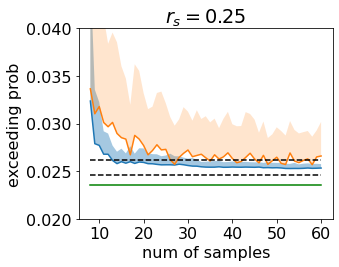

In [16]:
plot_results((0.02,0.04))

$r_s = 0.30$

In [17]:
# raw seq results including the input of samples 
seq_results_ = np.load('results/seq_030.npy', allow_pickle=True)
# seq exceeding prob 
seq_results = np.array([i[0] for i in seq_results_])
# lh exceeding prob 
lh_results = np.load('results/lh_030.npy', allow_pickle=True)

In [18]:
# the true results coming from part 1 in this notebook
r_s = 0.3
p_true = 0.00520
p_group_true = 0.00646

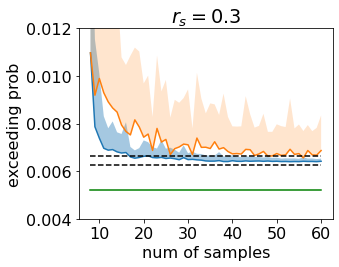

In [19]:
plot_results((0.004, 0.012))